In [ ]:
import os  # Importing the operating system module for interacting with the file system
import numpy as np  # Importing numpy for numerical operations
from sklearn.svm import SVC  # Importing Support Vector Classification from scikit-learn
from sklearn.metrics import classification_report, confusion_matrix  # Importing evaluation metrics
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
from tqdm import tqdm  # Importing tqdm for progress bars
import joblib  # Importing joblib for saving and loading models
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning
!pip install opencv-python
import cv2  # Importing OpenCV for image processing
import seaborn as sns  # Importing seaborn for statistical visualization
import time  # Importing time module for tracking execution time
from sklearn.decomposition import PCA  # Importing PCA for dimensionality reduction
from sklearn.pipeline import Pipeline  # Importing Pipeline for chaining preprocessing steps
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into training and testing sets

In [3]:
import zipfile  # Importing the zipfile module for working with ZIP archives

# Using a context manager to open the ZIP file in read mode ('r')
# 'train.zip' is the name of the ZIP file to be extracted
# 'dataset' is the directory where the contents of the ZIP file will be extracted
with zipfile.ZipFile('train.zip', 'r') as zip:
    zip.extractall('dataset')  # Extracting all contents of the ZIP file into the 'dataset' directory

In [4]:
import zipfile  # Importing the zipfile module for working with ZIP archives

# Using a context manager to open the ZIP file named 'test1.zip' in read mode ('r')
# 'dataset' is the directory where the contents of the ZIP file will be extracted
with zipfile.ZipFile('test1.zip', 'r') as zip:
    zip.extractall('dataset')  # Extracting all contents of the ZIP file into the 'dataset' directory

In [7]:
import os
!pip install opencv-python
import cv2  # Importing OpenCV for image processing
from tqdm import tqdm

# dog = 1, cat = 0
train_images = os.listdir('dataset/train')
features = []
labels = []
image_size = (50, 50)

# Processing train images
for image in tqdm(train_images, desc="Processing Train Images"):
    if image[0:3] == 'cat':
        label = 0
    else:
        label = 1
    image_read = cv2.imread('dataset/train' + "/" + image)
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    features.append(image_flatten)
    labels.append(label)

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 330.3 kB/s eta 0:01:57
   ---------------------------------------- 0.1/38.6 MB 469.7 kB/s eta 0:01:23
   ---------------------------------------- 0.1/38.6 MB 656.4 kB/s eta 0:00:59
   ---------------------------------------- 0.2/38.6 MB 985.7 kB/s eta 0:00:39
   ---------------------------------------- 0.3/38.6 MB 1.1 MB/s eta 0:00:35
   ----------------

Processing Train Images: 100%|██████████████████████████████████████████████████| 25000/25000 [02:46<00:00, 150.12it/s]


In [8]:
del train_images

In [10]:
from sklearn.model_selection import train_test_split
# Convert the 'features' list to a numpy array
features = np.asarray(features)

# Convert the 'labels' list to a numpy array
labels = np.asarray(labels)

# Split the dataset into training and testing sets
# 'features' contains the input data (images)
# 'labels' contains the corresponding target labels
# test_size=0.2 specifies that 20% of the data will be used for testing
# shuffle=True shuffles the data before splitting
# random_state=20 sets the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=20)

In [11]:
# Delete the 'features' variable from the current Python session
del features

# Delete the 'labels' variable from the current Python session
del labels

In [13]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Define the desired explained variance ratio for PCA
n_components = 0.8

# Initialize a PCA (Principal Component Analysis) object with the specified number of components
# 'n_components' is set to 0.8, indicating the desired explained variance ratio
pca = PCA(n_components=n_components)

# Initialize an SVM (Support Vector Machine) classifier
svm = SVC()

# Re-initialize PCA with the same number of components and a random state for reproducibility
pca = PCA(n_components=n_components, random_state=42)

# Create a Pipeline object to chain PCA and SVM together
# The Pipeline sequentially applies a list of transforms (PCA) and a final estimator (SVM)
pipeline = Pipeline([
    ('pca', pca),  # Add PCA as the first step in the pipeline
    ('svm', svm)   # Add SVM as the second step in the pipeline
])

In [14]:
# Define a dictionary specifying the hyperparameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [2, 1, 0.9, 0.8],  # Grid of values for the number of components in PCA
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Grid of values for the SVM kernel
}

In [15]:
import time  # Importing the time module for tracking execution time

# Record the starting time of the grid search
start_time = time.time()

# Initialize a GridSearchCV object with the pipeline, parameter grid, and cross-validation settings
# 'pipeline' is the pipeline containing PCA and SVM
# 'param_grid' is the hyperparameter grid to search
# 'cv=3' specifies 3-fold cross-validation
# 'verbose=4' sets the verbosity level to display detailed output
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=4)

# Perform the grid search to find the best hyperparameters
# 'X_train' is the training features
# 'y_train' is the training labels
grid_search.fit(X_train, y_train)

# Record the ending time of the grid search
end_time = time.time()

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END pca__n_components=2, svm__kernel=linear;, score=0.532 total time=  21.9s
[CV 2/3] END pca__n_components=2, svm__kernel=linear;, score=0.528 total time=  21.4s
[CV 3/3] END pca__n_components=2, svm__kernel=linear;, score=0.533 total time=  21.7s
[CV 1/3] END pca__n_components=2, svm__kernel=rbf;, score=0.568 total time=  18.2s
[CV 2/3] END pca__n_components=2, svm__kernel=rbf;, score=0.567 total time=  18.0s
[CV 3/3] END pca__n_components=2, svm__kernel=rbf;, score=0.569 total time=  17.9s
[CV 1/3] END pca__n_components=2, svm__kernel=poly;, score=0.494 total time=  12.7s
[CV 2/3] END pca__n_components=2, svm__kernel=poly;, score=0.500 total time=  13.2s
[CV 3/3] END pca__n_components=2, svm__kernel=poly;, score=0.486 total time=  12.7s
[CV 1/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.497 total time=  10.9s
[CV 2/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.498 total time=  10.9s
[CV 3/

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 1.68 GiB for an array with shape (225052500,) and data type float64

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_metho

In [16]:
del X_train
del y_train

In [17]:
# Retrieve the best estimator (pipeline) found by GridSearchCV
best_pipeline = grid_search.best_estimator_

# Retrieve the best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Retrieve the best cross-validated score found by GridSearchCV
best_score = grid_search.best_score_

# Print the best parameters and best score found by GridSearchCV
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'pca__n_components': 2, 'svm__kernel': 'rbf'}
Best Score:  0.5680500553430176


In [18]:
# Calculate the accuracy of the best pipeline on the test set
accuracy = best_pipeline.score(X_test, y_test)

# Print the accuracy of the best pipeline on the test set
print("Accuracy:", accuracy)

Accuracy: 0.5618


In [19]:
# Use the best pipeline to predict labels for the test set
y_pred = best_pipeline.predict(X_test)

# Define the target names for the classification report
target_names = ['Cat', 'Dog']

# Generate the classification report
# 'classification_report' function from scikit-learn generates a text report showing the main classification metrics
# 'y_test' contains the true labels, 'y_pred' contains the predicted labels
# 'target_names' parameter specifies the names of the classes for better interpretation
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

# Print the classification report
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

         Cat       0.58      0.42      0.49      2479
         Dog       0.55      0.70      0.62      2521

    accuracy                           0.56      5000
   macro avg       0.57      0.56      0.55      5000
weighted avg       0.57      0.56      0.55      5000



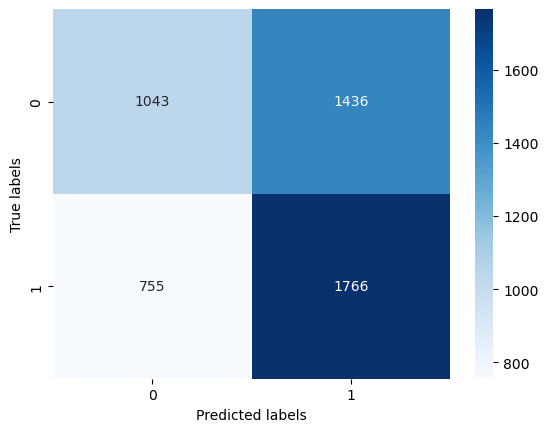

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
# 'confusion_matrix' function from scikit-learn computes the confusion matrix to evaluate the accuracy of a classification
# 'y_test' contains the true labels, 'y_pred' contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap using seaborn
# 'sns.heatmap' function from seaborn generates a heatmap visualization of the confusion matrix
# 'annot=True' displays the numerical values in each cell
# 'fmt="d"' specifies the format of the cell values as integers
# 'cmap="Blues"' sets the color map to be used in the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels to the x-axis and y-axis
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Display the heatmap
plt.show()